In [6]:
#Importar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Leer el dataset
data = pd.read_csv('data.csv')

data.head()

,Cancer Type,Male Risk Development Percentage,Male Risk Development Ratio(One in ____ Person),Male Risk Dying Percentage,Male Risk Dying Ratio(One in ____ Person),Female Risk Development Percentage,Female Risk Development Ratio(One in ____ Person),Female Risk Dying Percentage,Female Risk Dying Ratio(One in ____ Person)
0,Any cancer,41.6,2,19.0,5,39.6,3,17.0,6
1,Bladder,3.6,28,0.8,119,1.1,89,0.3,311
2,Brain and nervous system,0.7,145,0.5,192,0.5,186,0.4,243
3,Breast,0.1,726,0.1,3476,13.0,8,2.5,41
4,Colon and rectum,4.3,23,1.6,61,3.9,25,1.5,67


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Cancer Type                                        24 non-null     object 
 1   Male Risk Development Percentage                   24 non-null     float64
 2   Male Risk Development Ratio(One in ____ Person)    24 non-null     int64  
 3   Male Risk Dying Percentage                         24 non-null     float64
 4   Male Risk Dying Ratio(One in ____ Person)          24 non-null     int64  
 5   Female Risk Development Percentage                 24 non-null     float64
 6   Female Risk Development Ratio(One in ____ Person)  24 non-null     int64  
 7   Female Risk Dying Percentage                       24 non-null     float64
 8   Female Risk Dying Ratio(One in ____ Person)        24 non-null     int64  
dtypes: float64(4)

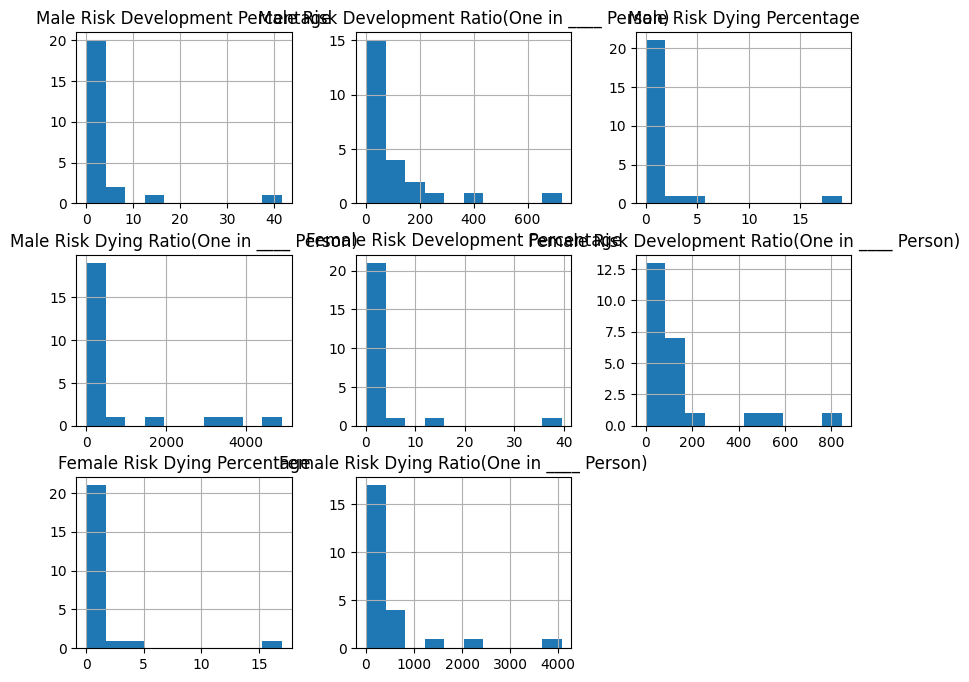

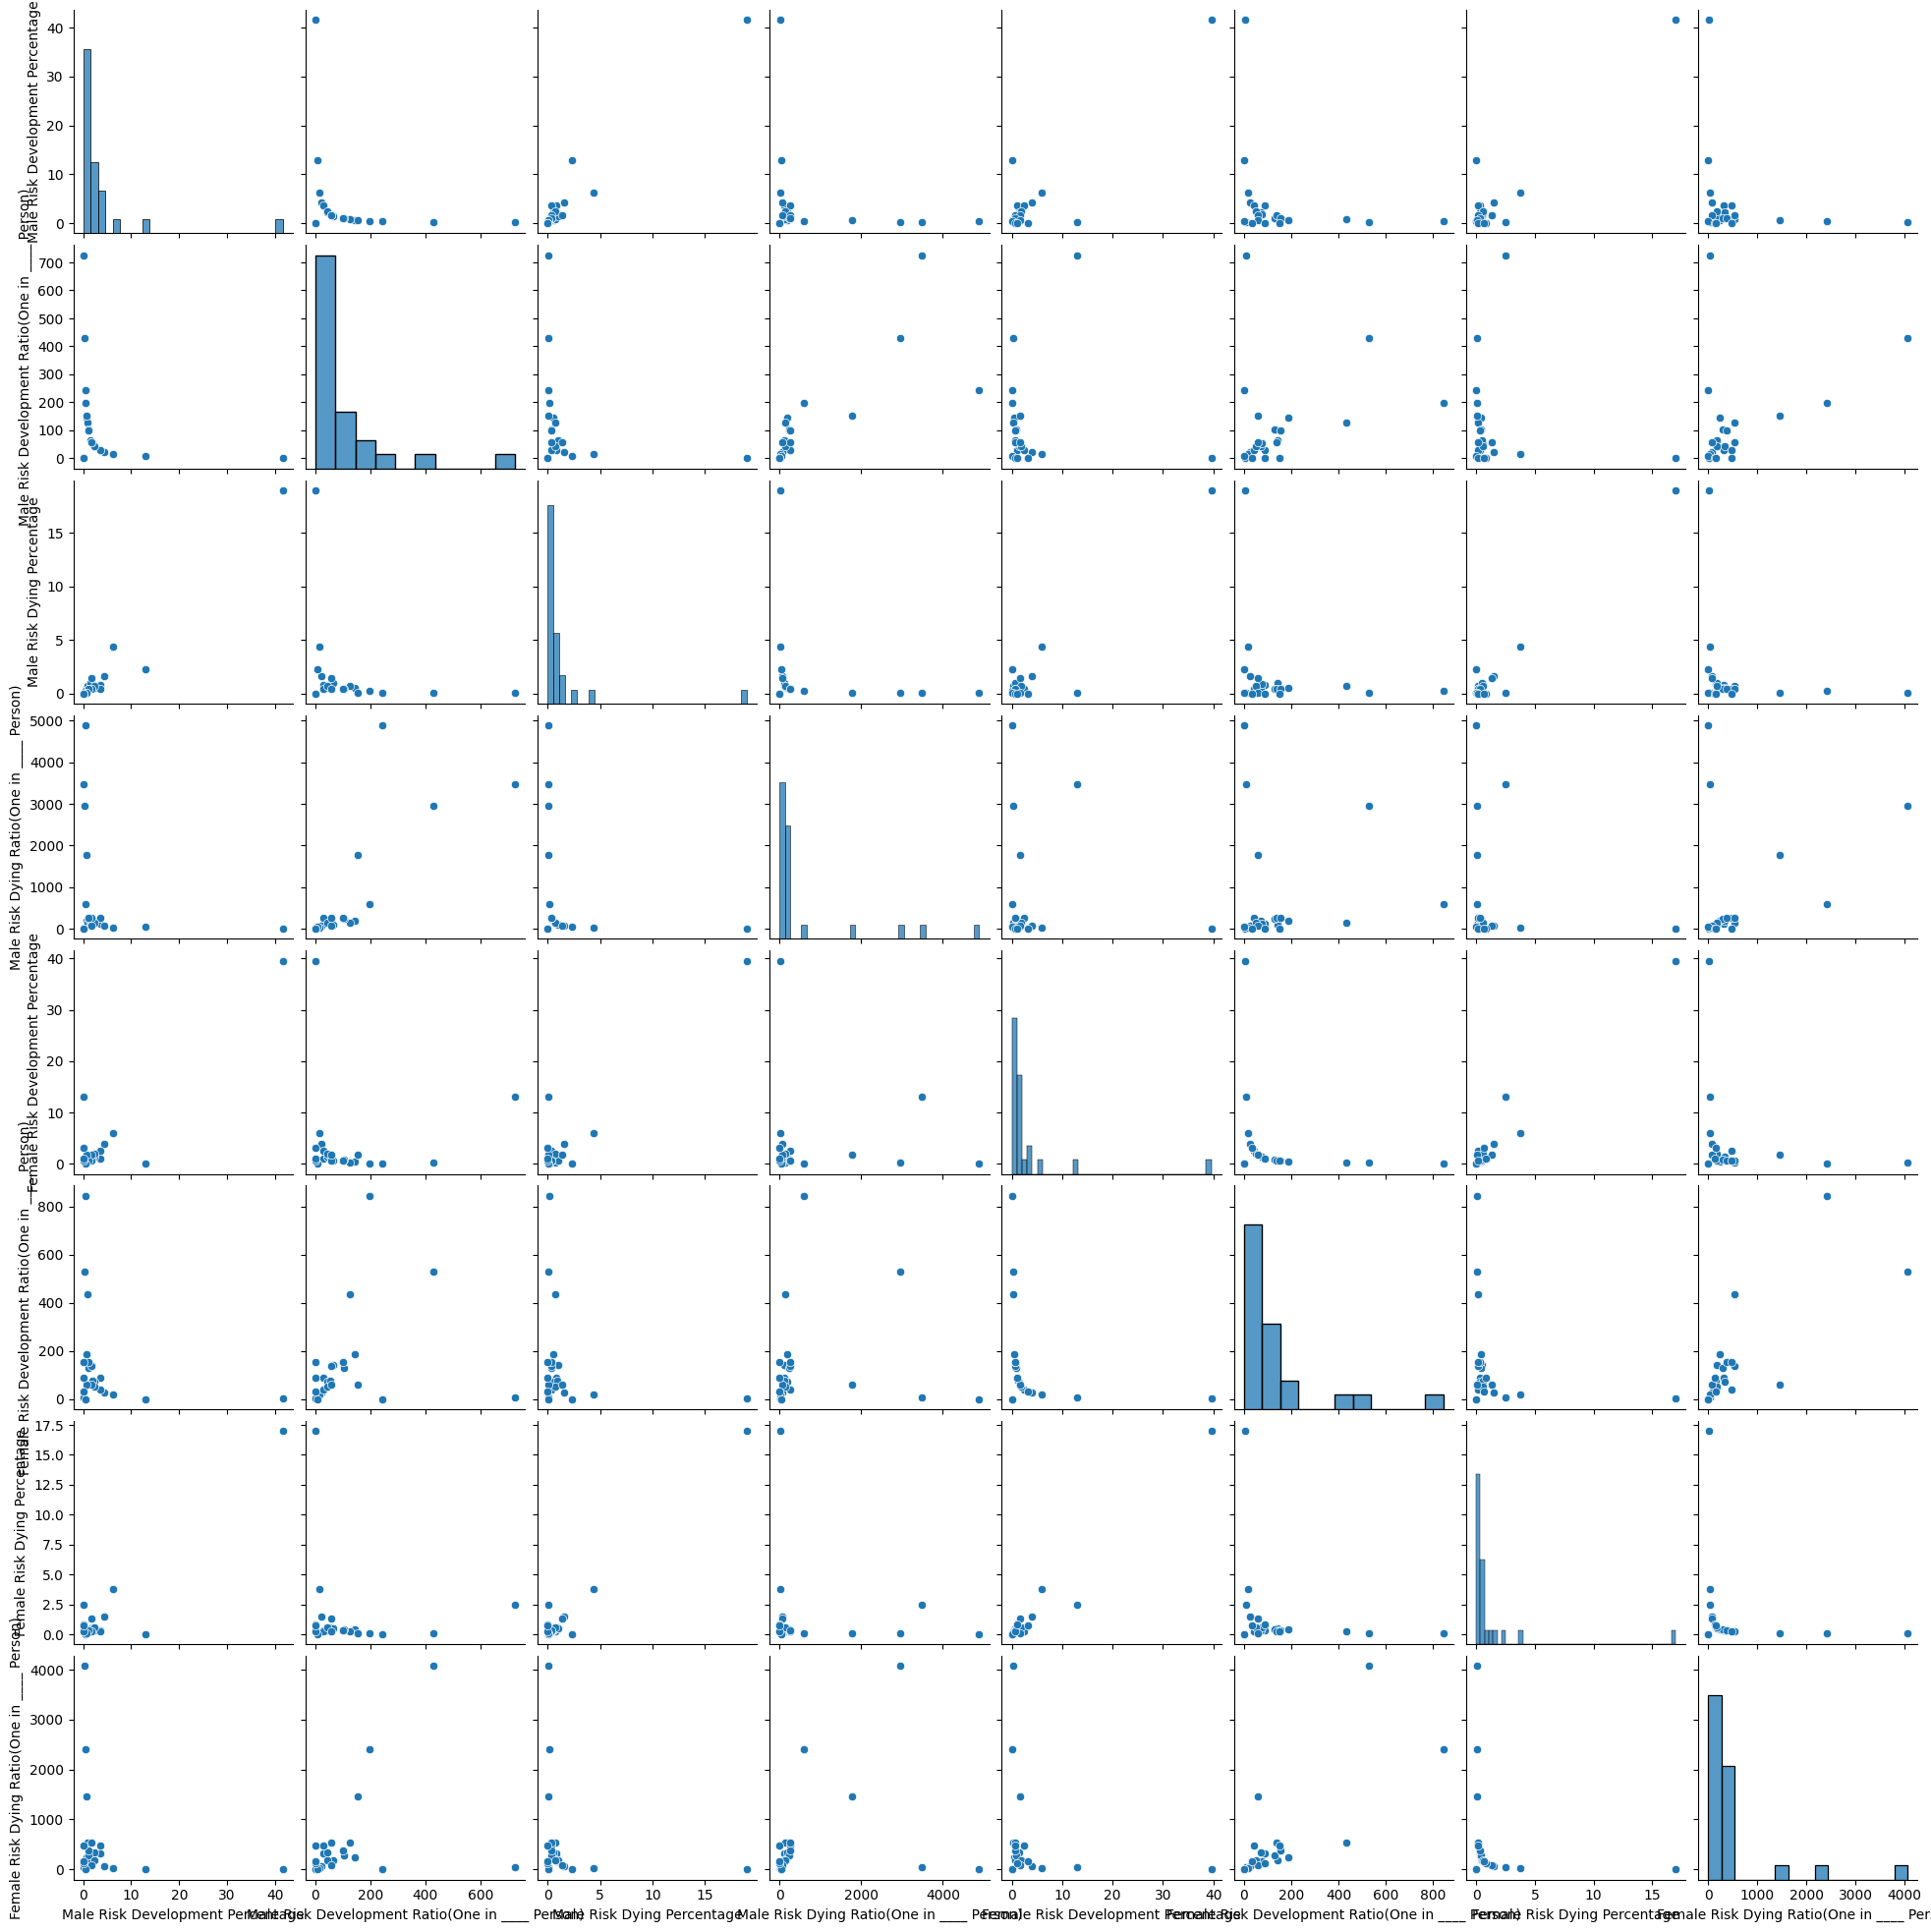

<Axes: >

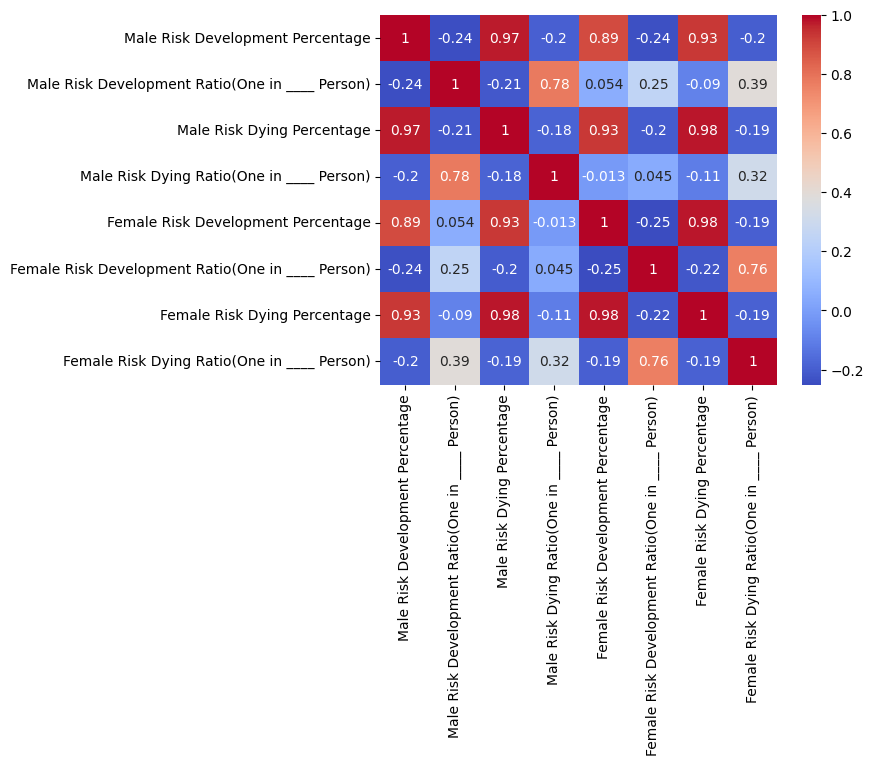

In [7]:
# 1. Descripción de los datos: obtener una visión general
data.info()

# 2. Descripción estadística: estadísticas básicas de las variables numéricas
data.describe()

# 3. Verificar valores nulos
data.isnull().sum()

# 4. Distribución de variables (visualización)
data.hist(figsize=(10, 8))
plt.show()

# Histograma de cada columna numérica
sns.pairplot(data)
plt.show()

# 6. Correlación entre variables numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [8]:
# Seleccionar columnas para el modelo
X = numeric_data[['Male Risk Development Percentage', 'Female Risk Development Percentage']]  # Variables independientes
y = numeric_data['Male Risk Dying Percentage']  

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Valor de la intersección (Intercepto): {model.intercept_}")
print(f"Coeficientes de las variables independientes: {model.coef_}")

# Comparar los valores reales con los predichos
comparison = pd.DataFrame({'Valor Real': y_test, 'Valor Predicho': y_pred})
print(comparison)

Error Cuadrático Medio (MSE): 18.072002320323797
Coeficiente de Determinación (R^2): 0.5007712617454655
Valor de la intersección (Intercepto): 0.18774963165272485
Coeficientes de las variables independientes: [ 0.17714563 -0.00322139]
    Valor Real  Valor Predicho
8          0.2        0.276000
16         1.4        0.483421
0         19.0        7.429441
18         0.4        0.362962
11         4.4        1.284761
9          0.9        0.520139
13         0.4        0.362318
1          0.8        0.821930
